In [ ]:
!unzip 'drive/MyDrive/Digital Recognizer/digit-recognizer.zip' -d 'drive/MyDrive/Digital Recognizer/' 

Archive:  drive/MyDrive/Digital Recognizer/digit-recognizer.zip
replace drive/MyDrive/Digital Recognizer/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/MyDrive/Digital Recognizer/sample_submission.csv  
replace drive/MyDrive/Digital Recognizer/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/MyDrive/Digital Recognizer/test.csv  
replace drive/MyDrive/Digital Recognizer/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/MyDrive/Digital Recognizer/train.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from tensorflow import keras 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
import itertools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical

In [ ]:
train = pd.read_csv('drive/MyDrive/Digital Recognizer/train.csv')
test = pd.read_csv('drive/MyDrive/Digital Recognizer/test.csv')
sample = pd.read_csv('drive/MyDrive/Digital Recognizer/sample_submission.csv')
print(train.head())
print(test.head())
print(sample.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [ ]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

X_test = test.iloc[:,0:]

In [ ]:
print(X_train.shape)
print(X_test.shape)

(42000, 784)
(28000, 784)


In [ ]:
# Viewing
train.sample(5, random_state=0)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16275,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19204,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18518,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25780,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16228,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


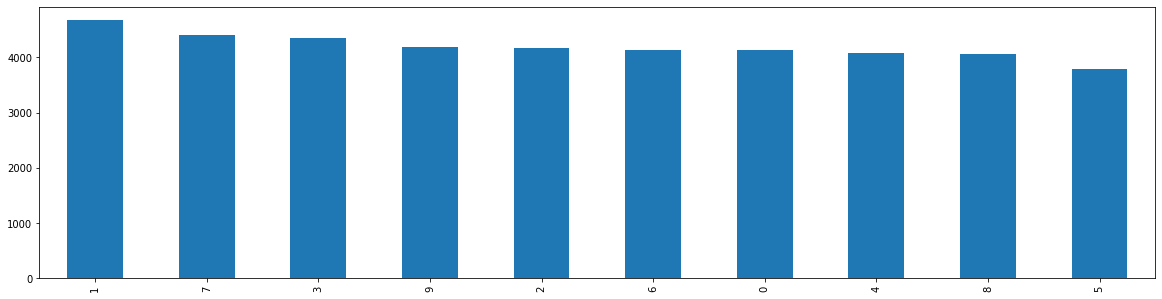

In [ ]:
train_label = train['label'].value_counts().plot.bar(figsize=(20,5))

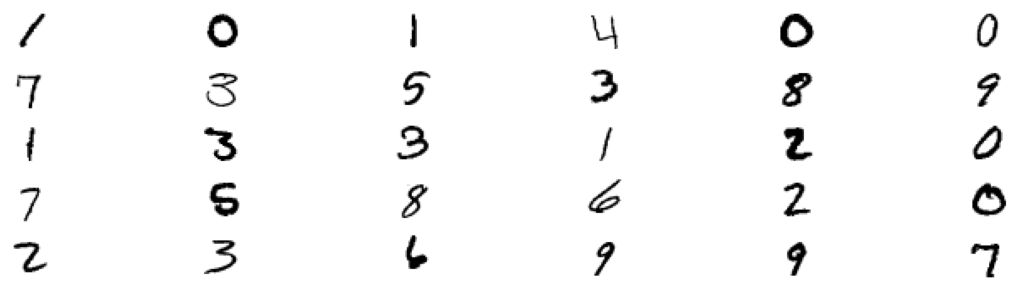

In [ ]:
for_visual = train.drop('label',axis=1).values

plt.figure(figsize=(20,5))
for i in range(30):  
    plt.subplot(5, 6, i+1)
    plt.imshow(for_visual[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')

In [ ]:
# X stands for features
X = train.drop('label',axis=1)
# Reshape the form of original dataset
X = X.values.reshape(42000,28,28,1)

# y stands for labels (target value)
y = train['label']


test_label = test.values.reshape(28000,28,28,1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=116)

In [ ]:
# Printing shape of train and validation data
print("X_train Shape: ",X_train.shape)
print("X_val Shape: ",X_val.shape)
print("y_train Shape: ",y_train.shape)
print("y_val Shape: ",y_val.shape)

X_train Shape:  (29400, 28, 28, 1)
X_val Shape:  (12600, 28, 28, 1)
y_train Shape:  (29400,)
y_val Shape:  (12600,)


In [ ]:
X_train.shape

(29400, 28, 28, 1)

In [ ]:
y_train.shape

(32970000, 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

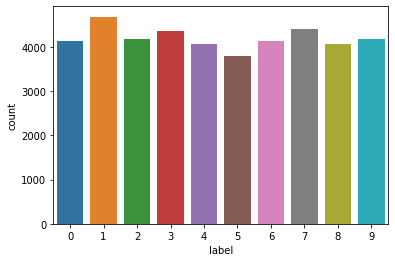

In [ ]:
sns.countplot(y)
y.value_counts()

In [ ]:
# Check the train data
print(np.isnan(X_train).sum().sum())

0


In [ ]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

AttributeError: ignored

In [ ]:
y_train = to_categorical(y_train, num_classes=10)

IndexError: ignored

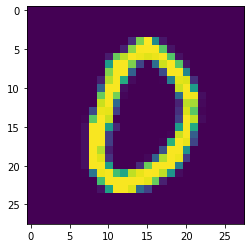

In [ ]:
# Checking random image
g = plt.imshow(X_train[35][:,:,0])

In [ ]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (5,5), padding= 'same', activation='relu',
                    input_shape = (28,28,1)))
    model.add(Conv2D(32, (5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation="softmax"))
    
    return model

model = createModel()
batch_size = 256
epochs = 50
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        16448     
                                                      

In [ ]:
# Define the optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
epochs = 40 
batch_size = 86

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
X.shape

(42000, 28, 28, 1)

In [ ]:
y.shape

(42000,)

In [ ]:
# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size=32),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

ValueError: ignored